# Аномалии и артефакты

ЗАДАНИЕ 1

Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

import os

In [2]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


ЗАДАНИЕ 3
сделайте ее перрасчет (ресемплинг) в представление по неделям. 

In [3]:
data_w = brent_data.resample('W').mean()

Проверка и удаление пропусков

In [4]:
#Проверка и удаление пропусков
ind= np.where(data_w['Значение'].isnull())
print(ind)
data_w[ind[0][0]:ind[0][0]+1]


(array([58], dtype=int64),)


,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Заполняем пропуск предыдущим значением
data_w[ind[0][0]:ind[0][0]+1].values[0]=data_w[ind[0][0]-1:ind[0][0]].values[0]
data_w[ind[0][0]:ind[0][0]+1]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-16,103.476667,2011.0,10.0,5.666667,4.0,278.666667,40.0,2.666667,0.0,0.166667,0.0


представление ряда первыми разностями

In [6]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff

ЗАДАНИЕ 2

Добавьте первые разности по стоимости доллара и евро к рублю

In [7]:
print(f'Значение ряда изменяется от  {np.min(data_w.index)} до {np.max(data_w.index)}')

Значение ряда изменяется от  2010-09-05 00:00:00 до 2019-09-01 00:00:00


In [8]:
rub_doll=pd.read_excel('RC_F05_09_2010_T01_09_2019.xlsx')
rub_doll.index = pd.to_datetime(rub_doll['data'].values).date
rub_doll = rub_doll.set_index(['data'])
rub_doll.drop(['nominal','cdx'], axis=1,inplace = True)
rub_doll_w=rub_doll.resample('W').mean()
rub_doll_w.head()

,curs
data,
2010-09-12,30.79402
2010-09-19,30.84672
2010-09-26,30.99920
2010-10-03,30.52764
2010-10-10,30.07338


In [9]:
rub_e=pd.read_excel('RC_F05_09_2010_T01_09_2019_2.xlsx')
rub_e.index = pd.to_datetime(rub_e['data'].values).date
rub_e = rub_e.set_index(['data'])
rub_e.drop(['nominal','cdx'], axis=1,inplace = True)
rub_e_w=rub_e.resample('W').mean()
rub_e_w.head()

,curs
data,
2010-09-12,39.29336
2010-09-19,39.97774
2010-09-26,41.04264
2010-10-03,41.35166
2010-10-10,41.62402


In [10]:
print(f'Значение ряда изменяется от  {np.min(rub_doll.index)} до {np.max(rub_doll.index)}')

Значение ряда изменяется от  2010-09-07 00:00:00 до 2019-08-31 00:00:00


In [11]:
print(f'Значение ряда изменяется от  {np.min(rub_e.index)} до {np.max(rub_e.index)}')

Значение ряда изменяется от  2010-09-07 00:00:00 до 2019-08-31 00:00:00


In [12]:
d_rub_doll = rub_doll_w['curs'].values[1:]- rub_doll_w['curs'].values[:-1]
d_rub_e = rub_e_w['curs'].values[1:]- rub_e_w['curs'].values[:-1]

rub_doll_w['diff_rub_doll'] = 0
rub_doll_w['diff_rub_doll'] =  rub_doll_w['diff_rub_doll'].astype('float') 
rub_doll_w['diff_rub_doll'].values[1:] = d_rub_doll

rub_e_w['diff_rub_e'] = 0
rub_e_w['diff_rub_e'] =  rub_e_w['diff_rub_e'].astype('float') 
rub_e_w['diff_rub_e'].values[1:] = d_rub_e

In [13]:
rub_doll_w.head()

,curs,diff_rub_doll
data,,
2010-09-12,30.79402,0.00000
2010-09-19,30.84672,0.05270
2010-09-26,30.99920,0.15248
2010-10-03,30.52764,-0.47156
2010-10-10,30.07338,-0.45426


In [14]:
rub_e_w.head()

,curs,diff_rub_e
data,,
2010-09-12,39.29336,0.00000
2010-09-19,39.97774,0.68438
2010-09-26,41.04264,1.06490
2010-10-03,41.35166,0.30902
2010-10-10,41.62402,0.27236


In [15]:
rub_doll_w.loc[rub_doll_w.index[np.where(rub_doll_w['diff_rub_doll'].isnull())[0]]]['diff_rub_doll'].index

DatetimeIndex(['2011-01-09', '2011-01-16', '2012-01-08', '2012-01-15',
               '2013-01-06', '2013-01-13', '2015-01-11', '2015-01-18',
               '2016-01-10', '2016-01-17', '2017-01-08', '2017-01-15',
               '2018-01-07', '2018-01-14', '2019-01-06', '2019-01-13'],
              dtype='datetime64[ns]', name='data', freq=None)

In [16]:
rub_e_w.loc[rub_e_w.index[np.where(rub_e_w['diff_rub_e'].isnull())[0]]]['diff_rub_e'].index

DatetimeIndex(['2011-01-09', '2011-01-16', '2012-01-08', '2012-01-15',
               '2013-01-06', '2013-01-13', '2015-01-11', '2015-01-18',
               '2016-01-10', '2016-01-17', '2017-01-08', '2017-01-15',
               '2018-01-07', '2018-01-14', '2019-01-06', '2019-01-13'],
              dtype='datetime64[ns]', name='data', freq=None)

обнуляем пропуски

In [17]:
rub_doll_w.loc[rub_doll_w['diff_rub_doll'].isnull(),'diff_rub_doll']=0
rub_e_w.loc[rub_e_w['diff_rub_e'].isnull(),'diff_rub_e']=0

In [18]:
data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,diff1
Дата,,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667,1.057333
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000,1.020000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000,-0.175000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000,2.693333


In [19]:
data_w.shape[0]

470

In [20]:
rub_doll_w.shape[0]

469

In [21]:
data_w['rub_doll_d']=0
data_w['rub_doll_d']=data_w['rub_doll_d'].astype('float') 
data_w['rub_doll_d'].values[1:]=rub_doll_w['diff_rub_doll'].values[:]

data_w['rub_e_d']=0
data_w['rub_e_d']=data_w['rub_e_d'].astype('float') 
data_w['rub_e_d'].values[1:]=rub_e_w['diff_rub_e'].values[:]

data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,diff1,rub_doll_d,rub_e_d
Дата,,,,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000,0.000000,0.00000,0.00000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667,1.057333,0.00000,0.00000
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000,1.020000,0.05270,0.68438
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000,-0.175000,0.15248,1.06490
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000,2.693333,-0.47156,0.30902


ЗАДАНИЕ 4

Постройте модель предсказания 1-й точки от текущей (h=1).

In [26]:
# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Дата') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Дата') >  split_date].copy()

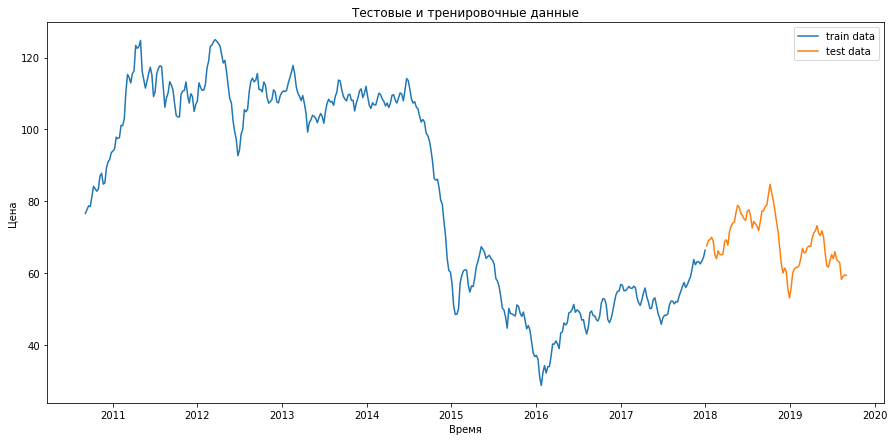

In [27]:
train, test = split_data( data_w, '2018-01-01')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Цена')
plt.plot(train.index.get_level_values('Дата'),train['Значение'], label='train data' )
plt.plot(test.index.get_level_values('Дата'),test['Значение'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [30]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
import seaborn as sns


In [31]:
scl_target=StandardScaler() 
p = 13
h=1
target = data_w['Значение'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(456, 1)

In [32]:
#Входные признаки
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(456, 14)

In [33]:
X_train =X[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
#Все модели возьмем в варианте параметров по умолчанию, кроме глубины деревьев.
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [35]:
print(X_test.shape)
y_test_pred_g = model_g.predict(X_test)

(73, 14)


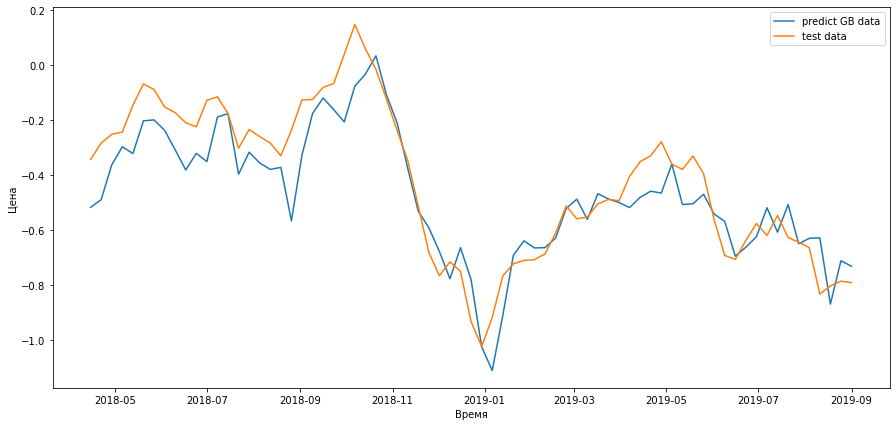

In [36]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Цена')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
param_dist = {"max_depth": [3, 2,10,14,5], 
              "n_estimators":[100,200,300,400,500, 1000, 1200,1500]}

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#  randomized search
n_iter_search = 30

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.723 (std: 0.183)
Parameters: {'n_estimators': 100, 'max_depth': 3}

Model with rank: 2
Mean validation score: 0.716 (std: 0.174)
Parameters: {'n_estimators': 300, 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.716 (std: 0.179)
Parameters: {'n_estimators': 200, 'max_depth': 2}



In [43]:
#100, 3
model_g = GradientBoostingRegressor(max_depth=3, random_state=0, n_estimators=100)
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [44]:
print(X_test.shape)
y_test_pred_g = model_g.predict(X_test)

(73, 14)


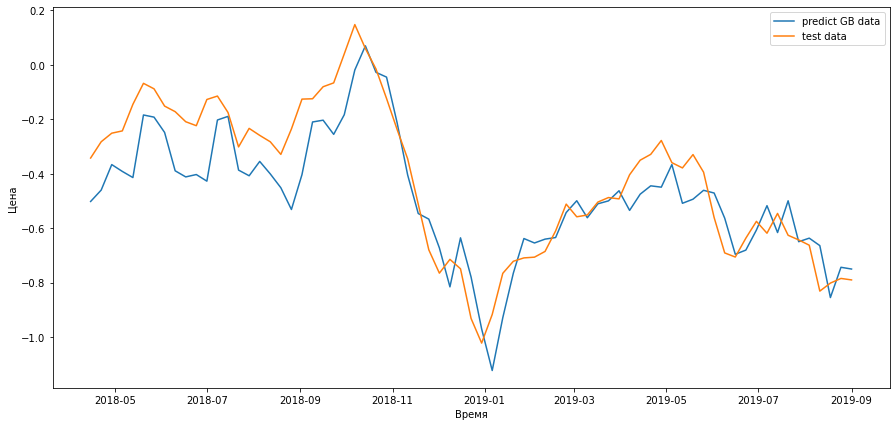

In [45]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Цена')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.016149514673631016 
ошибка mae  :   0.10394690807378465 
оценка R2 :   0.7794442086188085


ЗАДАНИЕ 5.

Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

Вывод : модель получилась неплохая, ошибки mse и mae небольшие, не хуже чем прямое прогнозирование на прошлых уроках 